#  🛒   **Анализ маркетплейса на примере Amazon**

# **Раздел 1: Импорт библиотек и установка цветовых параметров**

In [ ]:
## Подключение необходимых библиотек
import pandas as pd                 # Библиотека для работы с данными в виде таблиц (DataFrame)
from IPython.display import display # Для отображения DataFrame в красивом формате таблицы (замена print) / display(dataframe)
from datetime import datetime       # Модуль для работы с датами и временем
import numpy as np                  # Библиотека для работы с массивами и числовыми данными
import re                           # Библиотека для работы с регулярными выражениями

# Установка стиля для графиков
import seaborn as sns               # Библиотека для улучшенной визуализации данных на основе matplotlib
import matplotlib.pyplot as plt     # Библиотека для создания графиков и визуализаций

sns.set_style("whitegrid")          # Фон графика белый, График имеет сетку, Четкость

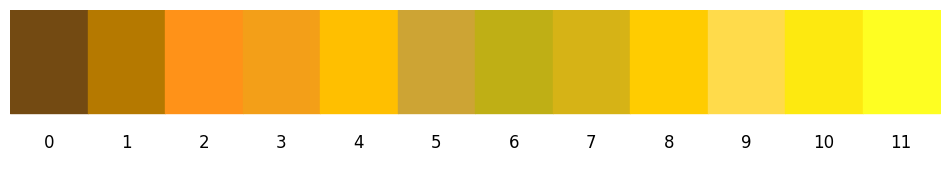

In [ ]:
# ЦВЕТОВАЯ ПОЛИТРА ГРАФИКОВ

contrast_colors = [
    '#734A12',  # 0 Натуральная умбра
    '#B57900',  # 1 Глубокий желтый
    '#FF9218',  # 2 Последний вздох Жако
    '#F39F18',  # 3 Солнечно-желтый
    '#FFBF00',  # 4 Янтарный
    '#CDA434',  # 5 Желто-золотой
    '#BFAF15',  # 6 Насыщенный желтый
    '#D6B316',  # 7 Желтый с оранжевым оттенком
    '#FFCC00',  # 8 Цвет Яндекса
    '#FFDB4B',  # 9 Яркий лимонный желтый
    '#FDE910',  # 10 Лимонный
    '#FEFE22'   # 11 Лазерный лимон
]

#FF4F00  Международный оранжевый (Сигнальный)

# Пример визуализации цветов
import matplotlib.pyplot as plt

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 2))

# Цикл по каждому цвету для отрисовки квадратов с индексами
for i, color in enumerate(contrast_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)  # Рисуем цветной прямоугольник
    plt.text(i + 0.5, -0.3, str(i), ha='center', va='center', fontsize=12, color='black')  # Индекс под цветом

# Настройка осей
plt.xlim(0, len(contrast_colors))
plt.ylim(-0.5, 1)
plt.axis('off')  # Убираем оси

# Показ графика
plt.show()


# **Раздел 2: Обработка исходного файла для целей анализа**

Выявим и устраним:

1.  Загружаем и изучаем файл с данными
2.  Примененим стиль CamelCase (соединение слов через подчеркивание) используем для удобства работы с переменными.
3.  Формат даты если он имеет вид Объета (object), переведем в формат даты datetime;
4.  Проверим и устраним наличие пустых ячеек (значения) или пропусков;



##1 . Получение источника информации

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [ ]:
# Загружаем данные файла bank_clients_transactions.csv
df_original = pd.read_csv('/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/amazon_market_data.csv')

# Проверим первые 5 строк для общего понимания структуры данных
df_original.head()


,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
# Получим именам всех колонок в DataFrame
df_original.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Получаем информацию о DataFrame
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

**Вывод:**
Некоторые столбцы требуют изменений для корректного анализа:
- Order Date : Преобразуем в формате datetime.

##2 . Приведение столбцов к стилю snake_case

Приведение названия колонок к стилю snake_case — это единое преобразование название колонок для удобства последующего анализа, при использовании Python для переменных и функций

при котором:
- слова преобразуются в нижний регистр
- пробелы между слов заменяются на подчеркивания

Результат обработки сохраняем в новое название **df_snake_case**

Это позволяет избежать путаницы, и код остаётся чистым

In [ ]:
# Функция для автоматического преобразования названий колонок в snake_case (стиль написания)
def snake_case(s):
    return s.lower().replace(' ', '_')  # Преобразуем в нижний регистр и заменяем пробелы на подчеркивания

# Применим к каждому названию столбца, используем метод rename() с функцией lambda
df_snake_case = df_original.rename(columns=lambda x: snake_case(x))

# Проверим результат
print("Измененные названия колонок в стиле snake_case:")
print(df_snake_case.columns)

Измененные названия колонок в стиле snake_case:
Index(['order_date', 'row_id', 'order_id', 'ship_mode', 'customer_id',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub-category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')


##3 . Преобразование даты

преобразуем столбцы в формат даты и времени:

- Order Date (Дата заказа), преобразуем формат даты в yyyy-mm-dd.


In [ ]:
# Приводим столбцы с датами к формату datetime, задав конкретный формат
df_snake_case['order_date'] = pd.to_datetime(df_snake_case['order_date'], format='%d-%m-%y', errors='coerce')

# Проверим результаты преобразования
print(df_snake_case[['order_date']].head())

# Получаем начальную и конечную даты без времени
start_date = df_snake_case['order_date'].min().date()
end_date = df_snake_case['order_date'].max().date()

# Выводим начальную и конечную даты
print(f"Начальная дата: {start_date}")
print(f"Конечная дата: {end_date}")

  order_date
0 2020-01-01
1 2020-01-01
2 2020-01-01
3 2020-01-01
4 2020-01-01
Начальная дата: 2020-01-01
Конечная дата: 2020-12-30


##4 . Поиск дублей и пропусков в данных и их обработка

In [ ]:
# Проверка на наличие пропущенных значений до обработки
missing_values = df_snake_case.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
# Проверка типов данных
print("Информация о df_snake_case перед сохранением:\n")
print(df_snake_case.info())

Информация о df_snake_case перед сохранением:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object     

##5 . Промежуточное сохранение подготовленного файла для анализа

Промежуточное сохранение подготовленного файла для анализа данных имеет несколько важных целей и преимуществ:

1. **Безопасность данных**: Промежуточное сохранение позволяет избежать потери данных в случае сбоя системы или ошибки в коде. Это особенно важно при работе с большими объемами данных, когда восстановление может занять много времени.

2. **Экономия времени**: Если промежуточные результаты уже сохранены, можно избежать повторного выполнения длительных операций обработки данных. Это позволяет быстрее переходить к следующему этапу анализа, особенно если обработка данных занимает значительное время.

3. **Упрощение отладки**: При промежуточном сохранении данных легче идентифицировать и исправлять ошибки. Можно проверить состояние данных на различных этапах обработки, что позволяет быстрее находить и устранять проблемы.

4. **Модульность анализа**: Промежуточные файлы помогают организовать процесс анализа, разделяя его на логические этапы. Это упрощает понимание того, что было сделано, и позволяет легко возвращаться к предыдущим шагам.

5. **Совместная работа**: Если несколько аналитиков работают над одним проектом, промежуточные файлы могут служить общей основой для дальнейшей работы. Это позволяет команде лучше координировать свои действия и делиться результатами.

6. **Гибкость в анализе**: Сохраненные промежуточные файлы могут использоваться для различных анализов и визуализаций, позволяя легко изменять подходы к исследованию данных без необходимости повторного сбора и обработки исходных данных.

7. **Документирование процесса**: Промежуточные файлы служат своего рода документированием анализа, показывая шаги и методы, которые были использованы для достижения конечного результата. Это полезно как для будущих исследований, так и для отчетности.

Эти преимущества делают промежуточное сохранение важным аспектом в процессе анализа данных, способствуя более эффективной и надежной работе.

In [ ]:
# df_snake_case = сохраняем в папке промежуточного сохраанения

# Присваиваем новое имя
df_purified = df_snake_case

# Укажите путь для сохранения
intermediate_path = '/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/'

# Сохранение DataFrame в CSV
df_purified.to_csv(intermediate_path + 'df_purified_market.csv', index=False)

# Проверка сохранения
print("Файл успешно сохранен:", intermediate_path + 'df_purified_market.csv')

# Загрузка данных для дальнейшего анализа
df_purified = pd.read_csv(intermediate_path + 'df_purified_market.csv', parse_dates=['order_date'])


Файл успешно сохранен: /content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/Промежуточные/df_purified_market.csv


In [ ]:
# Выводим основную информацию о DataFrame, чтобы понять типы данных и количество непустых значений
df_purified.info()

# Основная статистика по количественным данным — среднее, медиана, стандартное отклонение и другие показатели
df_purified.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object        
 15  sales         3312 non-null   float64 

,order_date,row_id,postal_code,sales,quantity,discount,profit
count,3312,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,2020-08-07 06:03:02.608695808,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
min,2020-01-01 00:00:00,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2020-05-15 00:00:00,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,2020-09-02 00:00:00,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,2020-11-06 00:00:00,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,2020-12-30 00:00:00,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800
std,NaN,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342


In [ ]:
# Словарь для хранения уникальных значений по каждому категориальному столбцу
unique_values = {}

# Перечисляем нужные столбцы и собираем уникальные значения
for column in ['segment', 'country', 'region', 'category', 'sub-category', 'ship_mode']:
    unique_values[column] = df_purified[column].unique()

# Выводим уникальные значения
for column, values in unique_values.items():
    print(f"Уникальные значения в '{column}': {values}")


Уникальные значения в 'segment': ['Consumer' 'Home Office' 'Corporate']
Уникальные значения в 'country': ['United States']
Уникальные значения в 'region': ['East' 'West' 'Central' 'South']
Уникальные значения в 'category': ['Furniture' 'Office Supplies' 'Technology']
Уникальные значения в 'sub-category': ['Furnishings' 'Binders' 'Storage' 'Chairs' 'Art' 'Appliances' 'Machines'
 'Tables' 'Accessories' 'Paper' 'Supplies' 'Fasteners' 'Envelopes'
 'Bookcases' 'Phones' 'Labels' 'Copiers']
Уникальные значения в 'ship_mode': ['Standard Class' 'First Class' 'Second Class' 'Same Day']


**Вывод по результатам обработки файла:**

---
**Анализируемы файл:**
В анализируемом файле период данных представлен:
- Начальная дата: 2020-01-01
- Конечная дата: 2020-12-30

**Количество записей:**
- В исходном файле: **3,312**
- После обработки: **3,312**, что достаточно для анализа.

**Преобразование форматов:**
- order_date (Дата заказа): формат даты преобразован в `yyyy-mm-dd` для корректного анализа. Данные приведены к типу `datetime` (datetime64[ns]).

**Дубликаты**: отсутствуют.

**Категориальные значения:**
В анализируемых данных есть информация которую можно анализировать по категириям:
- segment (сегмент) такие как:
    - Consumer (Потребительский)
    - 'Home Office' (дом Офис)
    - 'Corporate' (Корпоративный);
- country (страна), представлена только United States;
- region (регион) такие как:
    - 'East' (Восток)  
    - 'West' (Запад)
    - 'Central' (Центр)
    - 'South' (Юг);
- state (Штат);
- city (Город);
- category (категория товара) таакие как:
    - 'Furniture' (Мебель)
    - 'Office Supplies' (Офисные принадлежности)
    - 'Technology' (Техника);
- sub-category (подкатегория товара);

- ship_mode (класс продукта) - такие как:
    - 'Standard Class' (Стандартный класс)
    - 'First Class' (Первый класс)
    - 'Second Class' (Второй класс)
    - 'Same Day' (В тот же день)

**Название** файла для дальнейшего анализа: **df_purified** (очищенный файл), выполнено промежуточное сохранение для удобства работы с файлом

# **Раздел 3: Исследовательский анализ данных**

##1 . Уникальные заказы

Такой анализ полезен для проверки уникальности значений, помогает обнаружить дубликаты.

Используем метод nunique(), который подсчитает количество уникальных значений в колонке "order_id" (id заказа).


In [ ]:
# сколько уникальных заказов?
# Подсчитываем количество уникальных значений в столбце 'order_id'
unique_order = df_purified['order_id'].nunique()

# Выводим результат
print(f"Количество уникальных заказов: {unique_order}")


Количество уникальных заказов: 1687


##2 . Уникальные клиенты

Такой анализ полезен для проверки уникальности значений, помогает обнаружить дубликаты.

Используем метод nunique(), который подсчитает количество уникальных значений в колонке "customer_id" (id клиента).

In [ ]:
# сколько уникальных клиентов?
# Подсчитываем количество уникальных значений в столбце 'customer_id'
unique_customer = df_purified['customer_id'].nunique()

# Выводим результат
print(f"Количество уникальных клиентов: {unique_customer}")


Количество уникальных клиентов: 693


##3 . Локация пользователей и количество заказов

- выведем статистические данные по локации пользователей и локации количества заказов в категории:
    - регион
    - штат (выведем топ-10);
    - город (выведем топ-10)

- построим графики


###3.1. Локация пользователей по их количеству

In [ ]:
# 1. Топ-10 штатов по количеству уникальных пользователей
top_states_customers_stat = df_purified.groupby('state').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False).head(10)
top_states_customers_stat = top_states_customers_stat.rename(columns={'customer_id': 'unique_users'})
top_states_customers_stat['region'] = df_purified.groupby('state')['region'].first()  # Присваиваем регион для каждого штата

# 2. Топ-10 городов по количеству уникальных пользователей
top_cities_customers_stat = df_purified.groupby('city').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False).head(10)
top_cities_customers_stat = top_cities_customers_stat.rename(columns={'customer_id': 'unique_users'})
top_cities_customers_stat['region'] = df_purified.groupby('city')['region'].first()  # Присваиваем регион для каждого города

# 3. Количество уникальных пользователей по регионам
region_customers_stat = df_purified.groupby('region').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False)
region_customers_stat = region_customers_stat.rename(columns={'customer_id': 'unique_users'})

# Вывод статистики
print("Топ-10 штатов по количеству уникальных пользователей:")
print(top_states_customers_stat)
print("\nТоп-10 городов по количеству уникальных пользователей:")
print(top_cities_customers_stat)
print("\nКоличество уникальных пользователей по регионам:")
print(region_customers_stat)


Топ-10 штатов по количеству уникальных пользователей:
                unique_users   region
state                                
California               291     West
New York                 158     East
Texas                    153  Central
Illinois                  96  Central
Pennsylvania              94     East
Washington                93     West
Ohio                      82     East
Florida                   69    South
North Carolina            47    South
Tennessee                 33    South

Топ-10 городов по количеству уникальных пользователей:
               unique_users   region
city                                
New York City           133     East
Los Angeles             117     West
San Francisco            90     West
Philadelphia             88     East
Seattle                  77     West
Chicago                  66  Central
Houston                  48  Central
Columbus                 39    South
Dallas                   37  Central
Jacksonville             23

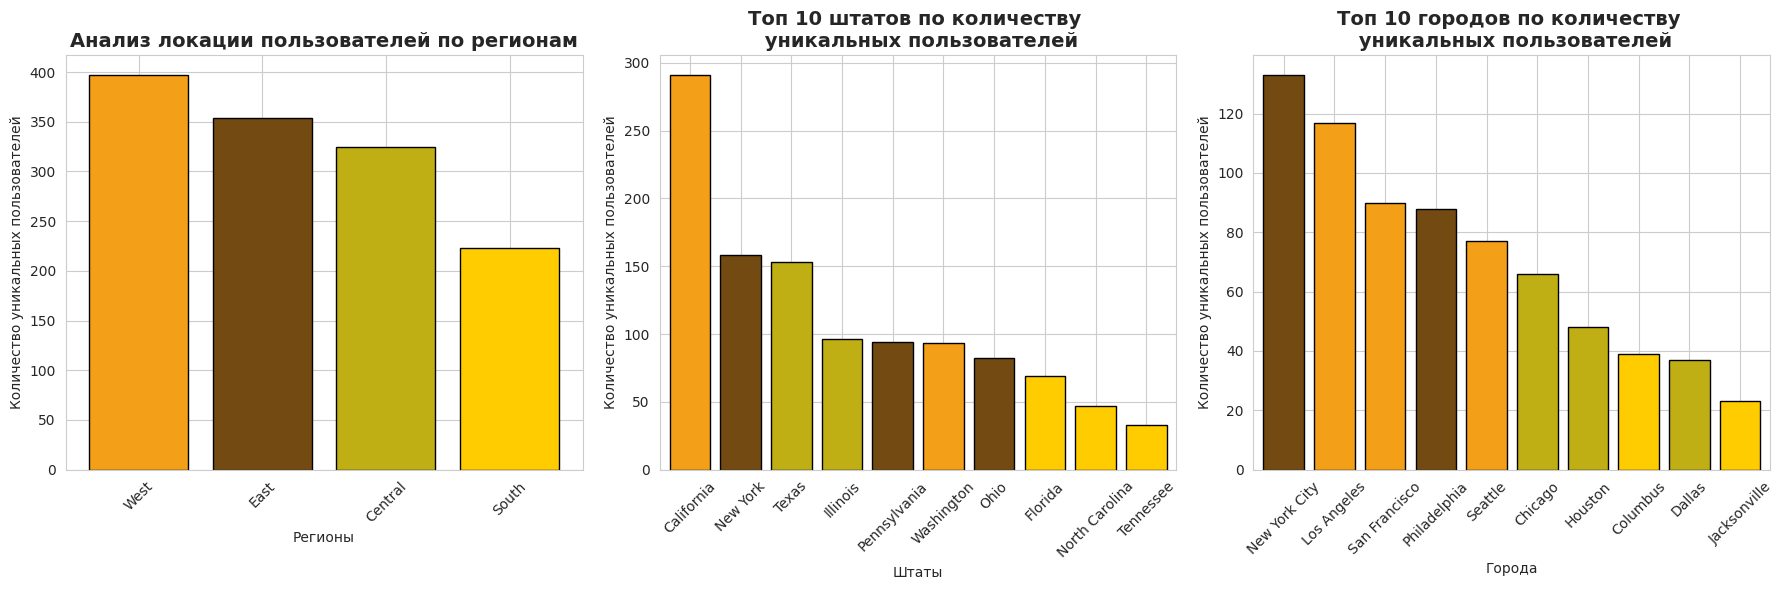

In [ ]:
# Словарь для присвоения цветов регионам
region_colors = {
    'East': contrast_colors[0],  # Используем первый цвет для Востока
    'West': contrast_colors[3],  # Используем второй цвет для Запада
    'Central': contrast_colors[6],  # Используем третий цвет для Центрального региона
    'South': contrast_colors[8]  # Используем четвертый цвет для Юга
}

# 1. Агрегируем данные по штатам
top_states_customers = df_purified.groupby('state').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False).head(10)
top_states_customers['region'] = df_purified.groupby('state')['region'].first()  # Присваиваем регион для каждого штата
top_states_customers['color'] = top_states_customers['region'].map(region_colors)  # Присваиваем цвет по региону

# 2. Агрегируем данные по городам
top_cities_customers = df_purified.groupby('city').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False).head(10)
top_cities_customers['region'] = df_purified.groupby('city')['region'].first()  # Присваиваем регион для каждого города
top_cities_customers['color'] = top_cities_customers['region'].map(region_colors)  # Присваиваем цвет по региону

# 3. Агрегируем данные по регионам
state_customers_region = df_purified.groupby('region').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False)
state_customers_region['color'] = state_customers_region.index.map(region_colors)  # Присваиваем цвет по региону

# Построение графиков на одной линии
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# График 3. Анализ пользователей по регионам с разными цветами для столбцов
axs[0].bar(state_customers_region.index, state_customers_region['customer_id'], color=state_customers_region['color'], edgecolor='black')
axs[0].set_title("Анализ локации пользователей по регионам", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Регионы")
axs[0].set_ylabel("Количество уникальных пользователей")
axs[0].tick_params(axis='x', rotation=45)  # Поворот подписей оси X

# График 1. Топ штатов по количеству уникальных пользователей с цветами по регионам
axs[1].bar(top_states_customers.index, top_states_customers['customer_id'], color=top_states_customers['color'], edgecolor='black')
axs[1].set_title("Топ 10 штатов по количеству \n уникальных пользователей", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Штаты")
axs[1].set_ylabel("Количество уникальных пользователей")
axs[1].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[1].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# График 2. Топ городов по количеству уникальных пользователей с цветами по регионам
axs[2].bar(top_cities_customers.index, top_cities_customers['customer_id'], color=top_cities_customers['color'], edgecolor='black')
axs[2].set_title("Топ 10 городов по количеству \n уникальных пользователей", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Города")
axs[2].set_ylabel("Количество уникальных пользователей")
axs[2].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[2].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# Отображение графиков
plt.tight_layout()
plt.show()


###3.2. Локация заказов по количеству

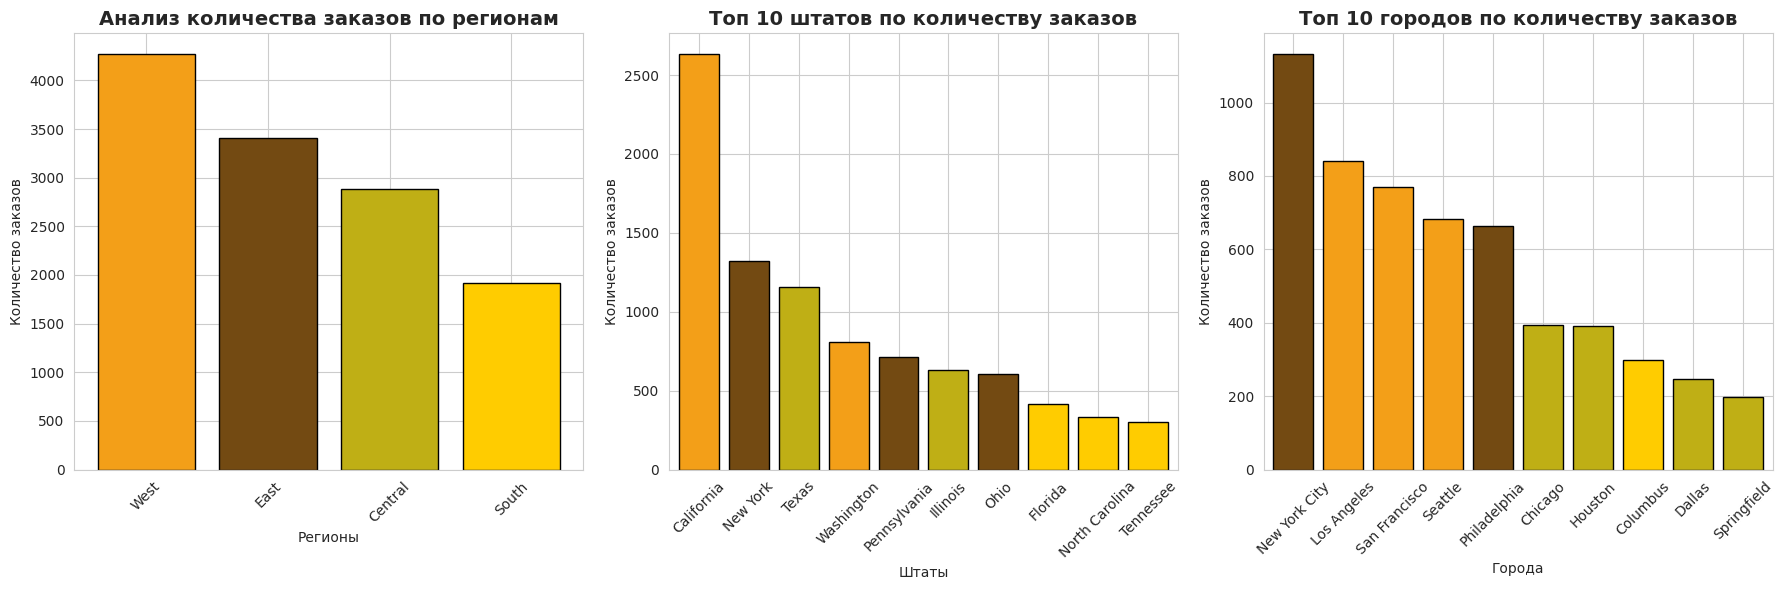

In [ ]:
# Словарь для присвоения цветов регионам
region_colors = {
    'East': contrast_colors[0],  # Используем первый цвет для Востока
    'West': contrast_colors[3],  # Используем второй цвет для Запада
    'Central': contrast_colors[6],  # Используем третий цвет для Центрального региона
    'South': contrast_colors[8]  # Используем четвертый цвет для Юга
}

# 1. Агрегируем данные по штатам
top_states_quantity = df_purified.groupby('state').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
top_states_quantity['region'] = df_purified.groupby('state')['region'].first()  # Присваиваем регион для каждого штата
top_states_quantity['color'] = top_states_quantity['region'].map(region_colors)  # Присваиваем цвет по региону

# 2. Агрегируем данные по городам
top_cities_quantity = df_purified.groupby('city').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
top_cities_quantity['region'] = df_purified.groupby('city')['region'].first()  # Присваиваем регион для каждого города
top_cities_quantity['color'] = top_cities_quantity['region'].map(region_colors)  # Присваиваем цвет по региону

# 3. Агрегируем данные по регионам
region_quantity = df_purified.groupby('region').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
region_quantity['color'] = region_quantity.index.map(region_colors)  # Присваиваем цвет по региону

# Построение графиков на одной линии
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# График 1. Анализ количества заказов по регионам с разными цветами для столбцов
axs[0].bar(region_quantity.index, region_quantity['quantity'], color=region_quantity['color'], edgecolor='black')
axs[0].set_title("Анализ количества заказов по регионам", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Регионы")
axs[0].set_ylabel("Количество заказов")
axs[0].tick_params(axis='x', rotation=45)  # Поворот подписей оси X

# График 2. Топ штатов по количеству заказов с цветами по регионам
axs[1].bar(top_states_quantity.index, top_states_quantity['quantity'], color=top_states_quantity['color'], edgecolor='black')
axs[1].set_title("Топ 10 штатов по количеству заказов", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Штаты")
axs[1].set_ylabel("Количество заказов")
axs[1].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[1].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# График 3. Топ городов по количеству заказов с цветами по регионам
axs[2].bar(top_cities_quantity.index, top_cities_quantity['quantity'], color=top_cities_quantity['color'], edgecolor='black')
axs[2].set_title("Топ 10 городов по количеству заказов", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Города")
axs[2].set_ylabel("Количество заказов")
axs[2].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[2].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# Отображение графиков
plt.tight_layout()
plt.show()


**Вывод о локации и зависимости пользователей и заказов**

---
Анализ зависимости между количеством уникальных пользователей и количеством заказов показал следующие ключевые моменты:

1. **Тренды по регионам**:
   - В регионах с наибольшим количеством уникальных пользователей, таких как **Запад** (397 пользователей) и **Восток** (354 пользователя), наблюдается более высокое количество заказов. Это подтверждает, что высокая концентрация пользователей ведет к большему числу заказов.
   - **Центральный** и **Южный** регионы, с меньшим количеством уникальных пользователей, имеют также низкие значения по количеству заказов. Это указывает на необходимость активизации маркетинговых усилий в этих регионах для стимулирования большего числа заказов.

2. **Связь между количеством пользователей и заказами**:
   - Прямой корреляции между количеством уникальных пользователей и количеством заказов можно наблюдать в крупных штатах, таких как **Калифорния** и **Нью-Йорк**, где большое количество пользователей приводит к значительным объемам заказов. Это подтверждается значительными цифрами по числу заказов и уникальных пользователей в этих регионах.
   - В меньших городах и штатах с более низким количеством пользователей (например, **Северная Каролина** и **Флорида**) наблюдается также меньший объем заказов, что подтверждает зависимость между этими двумя показателями.

3. **Города и их роль**:
   - В **Нью-Йорк-Сити**, где зафиксировано большое количество уникальных пользователей, также зафиксирован высокий объем заказов, что указывает на то, что концентрация пользователей в крупных городах способствует большему числу заказов.
   - В **Лос-Анджелесе** и **Сан-Франциско** аналогичная зависимость, где высокая активность пользователей приводит к большему числу заказов. В то время как в меньших городах с меньшей концентрацией пользователей, таких как **Колумбус** и **Даллас**, заказы могут быть менее частыми.

4. **Рекомендации**:
   - Для повышения эффективности бизнес-стратегий следует ориентироваться на регионы с высокой концентрацией пользователей, так как увеличение числа пользователей в этих регионах приведет к большему объему заказов.
   - В регионах с меньшим количеством пользователей (особенно **Южный** регион) следует разрабатывать программы лояльности или маркетинговые инициативы для увеличения вовлеченности и стимулирования большего числа заказов.
   - В крупных городах с высокой плотностью пользователей можно ожидать наибольшую активность заказов, и эти локации могут быть приоритетными для маркетинговых кампаний и новых предложений.

##4 . Динамика количества заказов по месяцам

Для анализа количества заказов по месяцам сгруппируем данные по месяцам, выявим тенденции в динамике продаж на основе линейного графика.

Количество заказов по месяцам:
order_month
2020-01    155
2020-02    107
2020-03    238
2020-04    203
2020-05    242
2020-06    245
2020-07    226
2020-08    218
2020-09    459
2020-10    298
2020-11    459
2020-12    462
Freq: M, dtype: int64


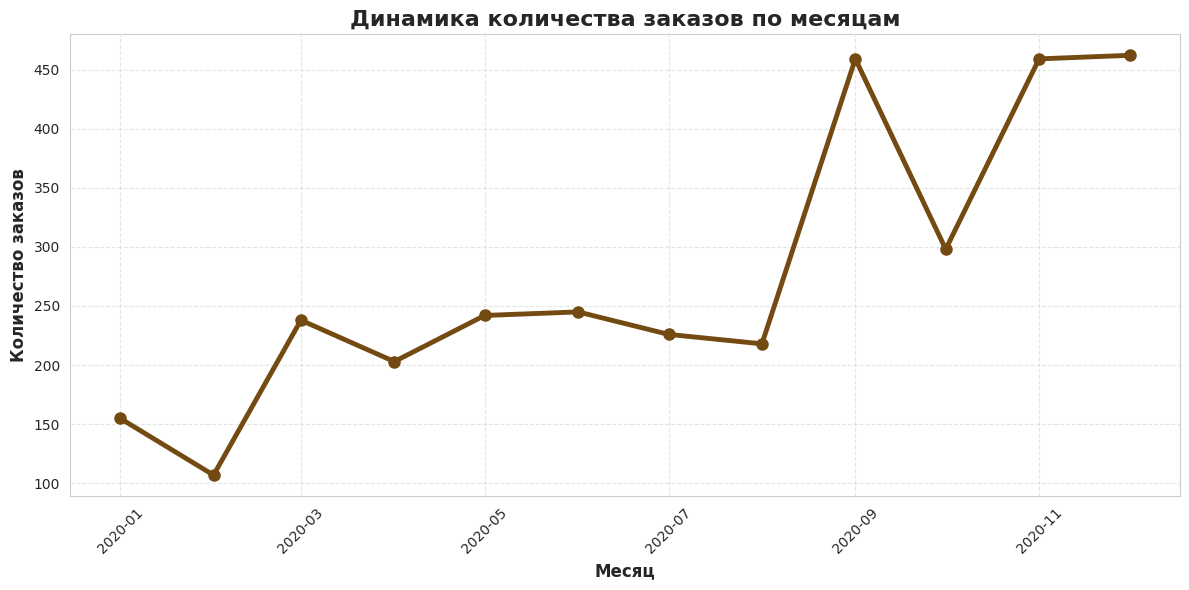

In [ ]:
# Преобразуем столбец с датами заказов в формат datetime, если это ещё не сделано
df_purified['order_date'] = pd.to_datetime(df_purified['order_date'])

# Добавляем столбец с месяцами
df_purified['order_month'] = df_purified['order_date'].dt.to_period('M')

# Группируем данные по месяцам и считаем количество заказов
monthly_orders = df_purified.groupby('order_month').size()

# Вывод статистики по месяцам
print("Количество заказов по месяцам:")
print(monthly_orders)

# Создаем линейный график
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.to_timestamp(), monthly_orders.values, linewidth=3.5, color=contrast_colors[0], markersize=8, marker='o')
plt.title('Динамика количества заказов по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12, fontweight='bold')
plt.ylabel('Количество заказов', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Вывод по динамике количества заказов по месяцам:**

Анализ динамики количества заказов по месяцам за 2020 год показывает значительные колебания в спросе:

1. **Рост заказов во втором полугодии**: Начиная с сентября, количество заказов заметно увеличивается, достигая пиковых значений в ноябре и декабре (459 и 462 заказа соответственно). Это может свидетельствовать о сезонности спроса и повышенной покупательской активности к концу года, вероятно, в связи с праздничными периодами и акциями.

2. **Спад в начале года**: В первые два месяца количество заказов было ниже среднего за год, особенно в феврале, где зафиксировано минимальное значение — 107 заказов. Такой спад может быть обусловлен завершением праздничного сезона и снижением активности покупателей.

3. **Стабильность в летний период**: В летние месяцы (с июня по август) количество заказов относительно стабильно, находясь в диапазоне от 218 до 245 заказов. Это свидетельствует о равномерном уровне спроса в этот период, возможно, благодаря сезонной устойчивости в продажах или рекламным кампаниям.

4. **Резкий рост с сентября**: Примечателен резкий скачок в сентябре, когда количество заказов увеличилось почти вдвое по сравнению с августом. Это может свидетельствовать о начале подготовки к праздничному сезону и роста потребительского интереса.

Таким образом, данные по месяцам показывают четкую сезонную динамику с пиковыми значениями в конце года, что можно учитывать при планировании маркетинговых акций и ресурсного обеспечения.

##5 . Динамика суммы продаж по месяцам

Для анализа суммы заказов по месяцам сгруппируем данные по месяцам, выявим тенденции в динамике продаж на основе линейного графика.


Сумма продаж по месяцам:
order_month
2020-01     43971.3740
2020-02     20301.1334
2020-03     58872.3528
2020-04     36521.5361
2020-05     44261.1102
2020-06     52981.7257
2020-07     45264.4160
2020-08     63120.8880
2020-09     87866.6520
2020-10     77776.9232
2020-11    118447.8250
2020-12     83829.3188
Freq: M, Name: sales, dtype: float64


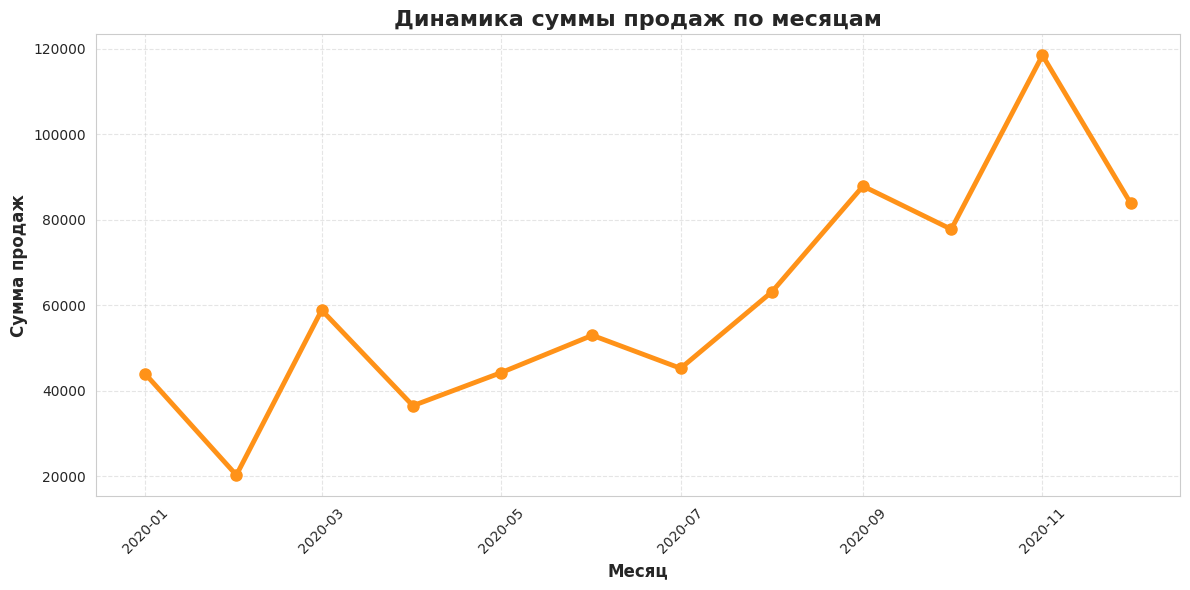

In [ ]:
# Преобразуем столбец с датами заказов в формат datetime, если это ещё не сделано
df_purified['order_date'] = pd.to_datetime(df_purified['order_date'])

# Добавляем столбец с месяцами
df_purified['order_month'] = df_purified['order_date'].dt.to_period('M')

# Группируем данные по месяцам и считаем сумму продаж
monthly_sales = df_purified.groupby('order_month')['sales'].sum()

# Вывод статистики по месяцам
print("Сумма продаж по месяцам:")
print(monthly_sales)

# Создаем линейный график
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, linewidth=3.5, color=contrast_colors[2], markersize=8, marker='o')
plt.title('Динамика суммы продаж по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12, fontweight='bold')
plt.ylabel('Сумма продаж', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Вывод о динамике суммы продаж по месяцам:**

---

Анализ динамики суммы продаж за 2020 год показывает следующие ключевые моменты:

1. **Сезонный рост**: Наблюдается значительный рост суммы продаж в ноябре, которая составила 118447.83. Этот рост может быть связан с акциями «Черная пятница» и предрождественскими распродажами, которые часто способствуют увеличению объемов продаж.

2. **Пик в сентябре**: Сумма продаж достигла 87866.65 в сентябре, что может свидетельствовать о успешных маркетинговых кампаниях или запуске новых продуктов.

3. **Общая тенденция**: В течение года сумма продаж варьировалась, с заметными пиками в марте (58872.35) и августе (63120.89), что может указывать на изменения в потребительском спросе и возможно, на влияние внешних факторов (например, экономических изменений или изменений в потребительских предпочтениях).

4. **Меньшие объемы в начале года**: Январь (43971.37) и февраль (20301.13) показали наименьшие объемы продаж, что может быть связано с послепраздничным спадом, когда потребительские расходы снижаются после рождественского шопинга.

5. **Март и апрель**: В марте (58872.35) наблюдается восстановление, но в апреле (36521.54) произошло снижение. Это может быть связано с введением ограничений из-за пандемии COVID-19, что могло повлиять на доступность товаров и покупательскую активность.

6. **Нестабильность в летние месяцы**: В июле (45264.42) и августе (63120.89) были замечены колебания, что указывает на непредсказуемость покупательского поведения в эти месяцы.

**Рекомендации**

- Необходимо проанализировать маркетинговые стратегии, особенно в преддверии пиковых месяцев, чтобы лучше понять, какие акции или кампании приводят к росту продаж.
- Рассмотреть возможность увеличения товарных запасов и рекламных кампаний в преддверии осенне-зимнего сезона, чтобы максимально использовать период пиковых продаж.

##6 . Распределение продаж по городам, штатам, регионам

In [ ]:
# Группируем данные по 'state' и рассчитываем основные статистические показатели
state_sales_stats = df_purified.groupby('state')['sales'].agg(['sum', 'mean', 'median', 'min', 'max']).sort_values(by='sum')
top_n = 10  # Количество штатов для отображения в топ-списке, можно регулировать

# Выводим статистику
top_stats = state_sales_stats.head(top_n)
print("Статистика продаж по топ-10 ШТАТАМ:")
print(top_stats)

# Группировка данных по 'city' и вычисление основных статистик по продажам
state_sales_city = df_purified.groupby('city')['sales'].agg(['sum', 'mean', 'median', 'min', 'max']).sort_values(by='sum', ascending=False)
top_n = 10  # Количество городов для отображения в топ-списке, можно регулировать

# Отбираем топ-10 городов по объему продаж
top_cities = state_sales_city.head(top_n)
print("Статистика продаж по топ-10 ГОРОДАМ:")
print(top_cities)

# Группируем данные по 'region' и рассчитываем основные статистические показатели
state_sales_region = df_purified.groupby('region')['sales'].agg(['sum', 'mean', 'median', 'min', 'max']).sort_values(by='sum')

# Выводим статистику
print("Статистика продаж по РЕГИОНАМ:")
print(state_sales_region)


Статистика продаж по топ-10 ШТАТАМ:
                           sum        mean   median     min      max
state                                                               
District of Columbia    77.760   38.880000   38.880  37.680   40.080
Iowa                   716.410   44.775625   31.335   5.400  207.000
Kansas                 733.150  122.191667   30.535  13.560  360.380
Vermont                842.210  168.442000   79.920   2.040  542.940
North Dakota           919.910  131.415714   25.900   2.480  704.760
South Dakota          1153.410  144.176250   51.915  14.620  416.320
West Virginia         1209.824  302.456000  265.120   6.240  673.344
Idaho                 1233.548  154.193500   65.965  21.312  477.150
New Hampshire         1509.430  215.632857  102.300  14.820  824.950
South Carolina        1560.750  195.093750  103.525  14.760  628.810
Статистика продаж по топ-10 ГОРОДАМ:
                      sum        mean   median    min        max
city                              

In [ ]:
# Топ 10 штатов по сумме продаж
top_states = df_purified.groupby('state').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)
print("Топ 10 штатов по продажам:")
print(top_states[['sales']])

# Топ 10 городов по сумме продаж
top_cities = df_purified.groupby('city').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)
print("\nТоп 10 городов по продажам:")
print(top_cities[['sales']])

# Список уникальных регионов
regions_list = df_purified['region'].unique()
print("\nСписок уникальных регионов:")
print(regions_list)


Топ 10 штатов по продажам:
                      sales
state                      
California      146388.3445
New York         93922.9950
Washington       65539.8960
Texas            43421.7582
Pennsylvania     42688.3060
Florida          26444.7155
Michigan         25833.6490
Illinois         24351.6110
North Carolina   23456.8290
Ohio             23264.8500

Топ 10 городов по продажам:
                    sales
city                     
New York City  86939.6010
Seattle        56990.8200
Los Angeles    48875.6925
Philadelphia   41595.5020
San Francisco  37197.5510
Columbus       17571.4730
Chicago        16245.6110
Houston        16212.8064
Newark         13808.4680
Jackson        13592.2710

Список уникальных регионов:
['East' 'West' 'Central' 'South']


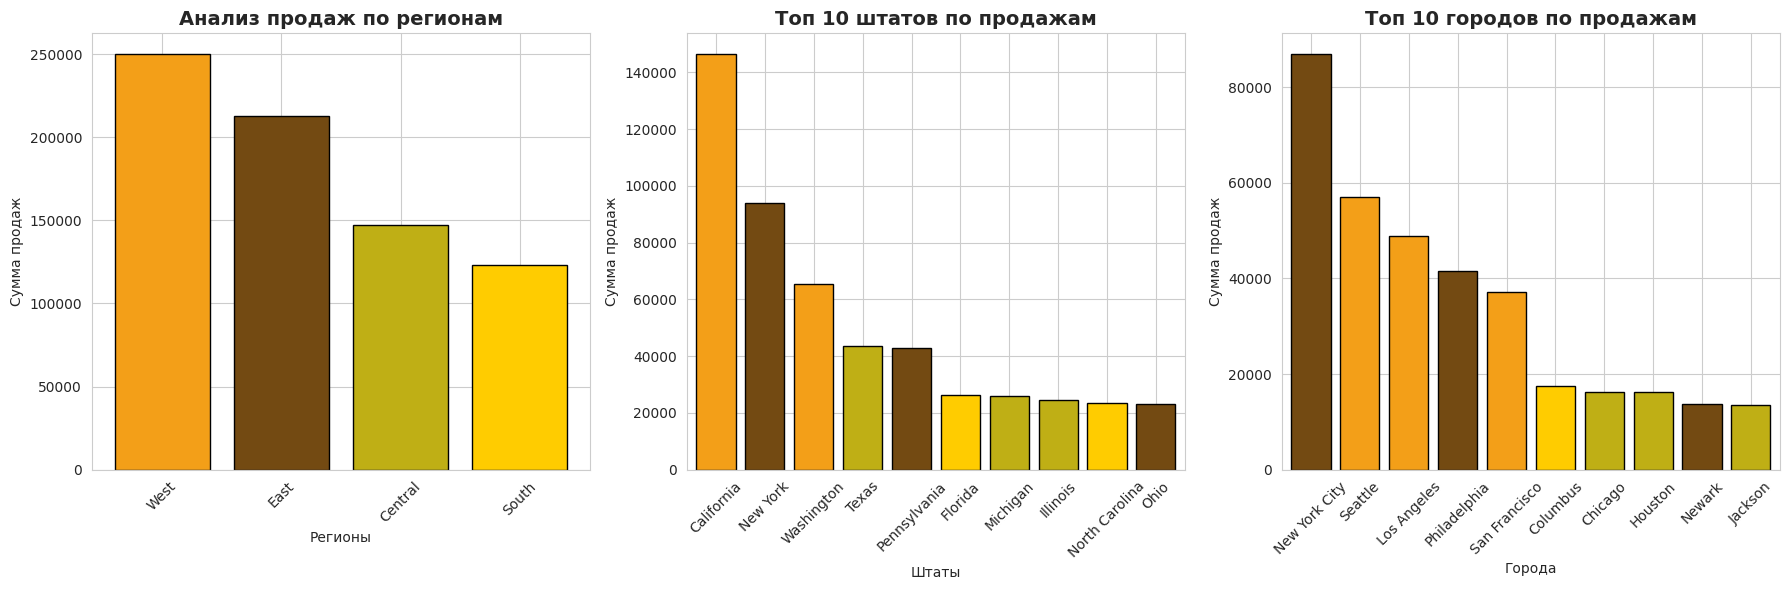

In [ ]:
# Словарь для присвоения цветов регионам
region_colors = {
    'East': contrast_colors[0],  # Используем первый цвет для Востока
    'West': contrast_colors[3],  # Используем второй цвет для Запада
    'Central': contrast_colors[6],  # Используем третий цвет для Центрального региона
    'South': contrast_colors[8]  # Используем четвертый цвет для Юга
}

# 1. Агрегируем данные по штатам
top_stats = df_purified.groupby('state').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)
top_stats['region'] = df_purified.groupby('state')['region'].first()  # Присваиваем регион для каждого штата
top_stats['color'] = top_stats['region'].map(region_colors)  # Присваиваем цвет по региону

# 2. Агрегируем данные по городам
top_cities = df_purified.groupby('city').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)
top_cities['region'] = df_purified.groupby('city')['region'].first()  # Присваиваем регион для каждого города
top_cities['color'] = top_cities['region'].map(region_colors)  # Присваиваем цвет по региону

# 3. Агрегируем данные по регионам
state_sales_region = df_purified.groupby('region').agg({'sales': 'sum'}).sort_values('sales', ascending=False)
state_sales_region['color'] = state_sales_region.index.map(region_colors)  # Присваиваем цвет по региону

# Построение графиков на одной линии
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# График 3. Анализ продаж по регионам с разными цветами для столбцов
axs[0].bar(state_sales_region.index, state_sales_region['sales'], color=state_sales_region['color'], edgecolor='black')
axs[0].set_title("Анализ продаж по регионам", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Регионы")
axs[0].set_ylabel("Сумма продаж")
axs[0].tick_params(axis='x', rotation=45)  # Поворот подписей оси X

# График 1. Топ штатов по продажам с цветами по регионам
axs[1].bar(top_stats.index, top_stats['sales'], color=top_stats['color'], edgecolor='black')
axs[1].set_title("Топ 10 штатов по продажам", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Штаты")
axs[1].set_ylabel("Сумма продаж")
axs[1].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[1].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# График 2. Топ городов по продажам с цветами по регионам
axs[2].bar(top_cities.index, top_cities['sales'], color=top_cities['color'], edgecolor='black')
axs[2].set_title("Топ 10 городов по продажам", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Города")
axs[2].set_ylabel("Сумма продаж")
axs[2].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[2].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# Отображение графиков
plt.tight_layout()
plt.show()


**Вывод о распределении продаж по городам, штатам, регионам:**

---

Анализ суммарных продаж по городам, штатам и регионам выявил следующее:

1. **Продажи по городам**:
   - Наибольшая суммарная выручка наблюдается в городе Нью-Йорк (86,939.60), что делает его ведущим рынком среди городов.
   - Второе и третье места занимают Сиэтл (56,990.82) и Лос-Анджелес (48,875.69), что также указывает на высокий спрос в этих местах.
   - В десятку лидеров также входят Филадельфия, Сан-Франциско и Чикаго, что демонстрирует преимущественно сильные продажи на крупных городских рынках.

2. **Продажи по штатам**:
   - Лидирует штат Калифорния с выручкой 146,388.34, что связано с его плотной сетью экономически развитых городов.
   - Нью-Йорк (93,922.99) и Вашингтон (65,539.90) занимают второе и третье места соответственно, что также свидетельствует о значительном объеме продаж в этих штатах.
   - Штаты, такие как Техас и Пенсильвания, занимают средние позиции в рейтинге, демонстрируя умеренный спрос на продукцию.

3. **Продажи по регионам**:
   - Наиболее прибыльным регионом оказался Запад с суммарными продажами 250,128.37, что объясняется высоким спросом в таких штатах, как Калифорния и Вашингтон.
   - Регион Восток также показал значительные продажи (213,082.90), особенно благодаря штатам Нью-Йорк и Пенсильвания.
   - Центральный и Южный регионы имеют меньшие объемы продаж, что может говорить о необходимости дополнительных маркетинговых мероприятий или адаптации предложений для этих регионов.

Этот анализ позволяет компании ориентироваться на наиболее прибыльные города и штаты для дальнейшего масштабирования и фокусирования маркетинговых усилий в данных регионах.

##7 . Распределение продаж по категориям заказов

Для анализа распределения продаж по категориям и подкатегориям создаем отдельную таблицу с суммарными продажами по каждой категории и подкатегориям, а затем построим две столбчатые графики:
- одна для суммарных продаж по категориям,
- другая — для суммарных продаж по подкатегориям.

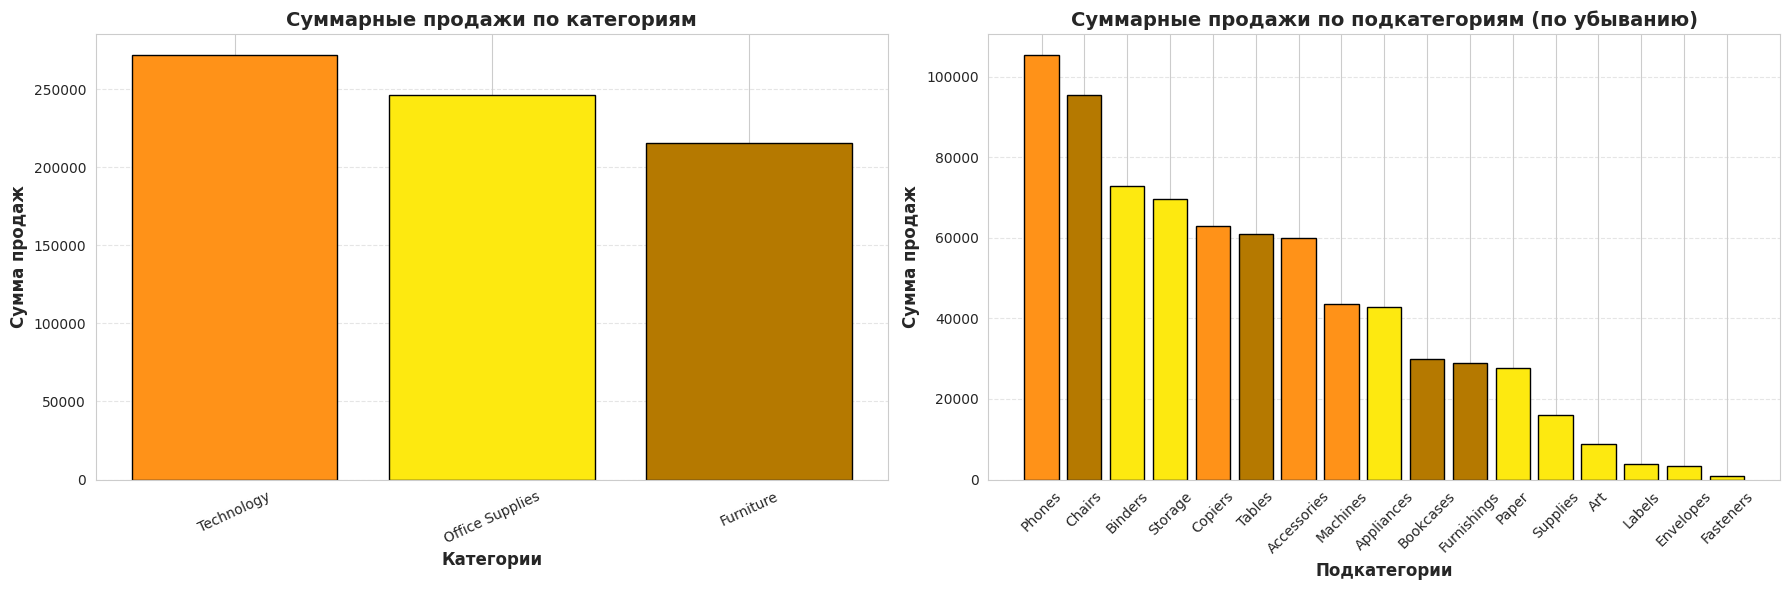

In [ ]:
# Создаем новую таблицу с суммарными продажами по категориям и подкатегориям
category_sales = df_purified.groupby(['category', 'sub-category'])['sales'].sum().reset_index()

# Таблица с суммарными продажами по категориям
category_totals = category_sales.groupby('category')['sales'].sum().sort_values(ascending=False)

# Таблица с суммарными продажами по подкатегориям, отсортированная по убыванию
subcategory_totals = category_sales.groupby(['category', 'sub-category'])['sales'].sum().reset_index()
subcategory_totals = subcategory_totals.sort_values(by='sales', ascending=False)

# Уникальные цвета для категорий
category_colors = {

    'Furniture': contrast_colors[1],        # Мебель
    'Office Supplies': contrast_colors[10],  # Офисные принадлежности
    'Technology': contrast_colors[2]        # Техника
}

# Либо цвет по политре
# category_colors = {category: color for category, color in zip(category_totals.index, contrast_colors[:len(category_totals)])}

# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# График 1: Суммарные продажи по категориям с уникальными цветами
axs[0].bar(category_totals.index, category_totals.values, color=[category_colors[cat] for cat in category_totals.index], edgecolor='black')
axs[0].set_title("Суммарные продажи по категориям", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Категории", fontsize=12, fontweight='bold')
axs[0].set_ylabel("Сумма продаж", fontsize=12, fontweight='bold')
axs[0].grid(axis='y', linestyle='--', alpha=0.5)
axs[0].tick_params(axis='x', rotation=25)

# График 2: Суммарные продажи по подкатегориям, отсортированные по убыванию, с цветами категорий
axs[1].bar(subcategory_totals['sub-category'], subcategory_totals['sales'],
           color=[category_colors[cat] for cat in subcategory_totals['category']], edgecolor='black')
axs[1].set_title("Суммарные продажи по подкатегориям (по убыванию)", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Подкатегории", fontsize=12, fontweight='bold')
axs[1].set_ylabel("Сумма продаж", fontsize=12, fontweight='bold')
axs[1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1].tick_params(axis='x', rotation=45)

# Настройка и отображение графиков
plt.tight_layout()
plt.show()


**Вывод о распределении суммы продаж по категории заказа:**

---

Анализ суммарных продаж по категориям и подкатегориям показывает, что наиболее доходной категорией является **Technology** (Техника), с наибольшей суммой продаж в подкатегории "Phones" (Телефон) (105,340.52).

**Furniture** (Мебель) также демонстрирует высокие продажи, особенно в подкатегории "Chairs" (Стулья) (95,554.35), что говорит о значительном спросе на предметы интерьера и офисную мебель.

В категории **Office Supplies** (Офисные принадлежности) лидером являются "Binders" (Папки) (72,788.05), подтверждая высокую потребность в расходных материалах для офиса.

Таким образом:
- Категория **Technology** (Техника) выделяется крупными продажами в подкатегориях, таких как "Phones" (Телефон) и "Copiers" (Копировальные аппараты), что свидетельствует о востребованности технологий и оборудования.
- **Furniture** (Мебель) занимает второе место, с особенно высоким спросом на "Chairs" (Стулья) и "Tables" (Столы).
- В категории **Office Supplies** (Офисные принадлежности) продажи распределены относительно равномерно, но особенно популярны такие подкатегории, как "Binders" (Папки) и "Storage" (Канцерярские принаадлежности).

Эти данные могут использоваться для дальнейшего планирования закупок и определения стратегий продаж для каждой подкатегории.

##8 . Самые популярные товары

Для анализа самых популярных товаров по количеству заказов сгруппируем данные по наименованию товара ( Product Name), подсчитывает количество заказов для каждого товара и выведим топ-10 самых популярных товаров в виде столбчатой диаграаммы.

Топ-10 самых популярных товаров:
product_name
Easy-staple paper                                  16
Staples                                            15
Staples in misc. colors                            12
Staple envelope                                    11
Staple remover                                      8
Global Wood Trimmed Manager's Task Chair, Khaki     8
Storex Dura Pro Binders                             8
Strathmore Photo Mount Cards                        7
Sterilite Officeware Hinged File Box                7
Logitech Desktop MK120 Mouse and keyboard Combo     7
Name: count, dtype: int64


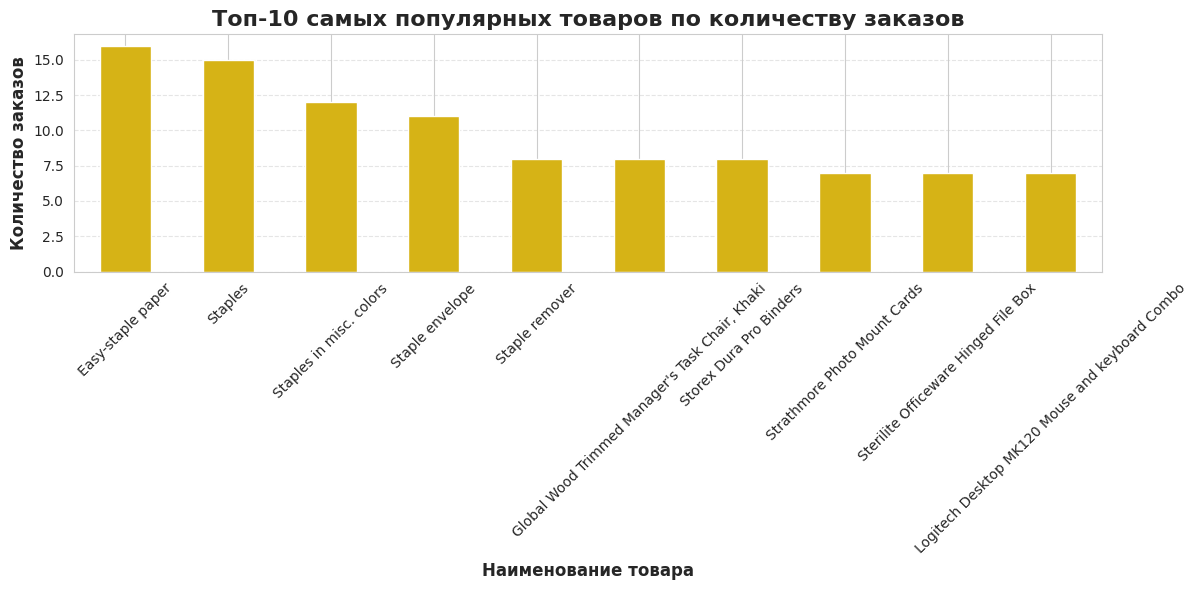

In [ ]:
# Группируем данные по наименованию продукта и считаем количество заказов
top_products = df_purified['product_name'].value_counts().head(10)

# Выводим статистику по топ-10 товарам
print("Топ-10 самых популярных товаров:")
print(top_products)

# Создаем столбчатый график
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color=contrast_colors[7])
plt.title('Топ-10 самых популярных товаров по количеству заказов', fontsize=16, fontweight='bold')
plt.xlabel('Наименование товара', fontsize=12, fontweight='bold')
plt.ylabel('Количество заказов', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Вывод о популярных товарах:**

---

Топ-10 самых популярных товаров по количеству заказов:

- Бумага писчая - 16 заказов
- Скобы - 15 заказов
- Скобы в разном. цвета - 12 заказов
- Конверт скрепленный - 11 заказов
- Степлер - 8 заказов
- Кресло менеджера Global Wood Trimmed, Хаки - 8 заказов
- Папки Storex Dura Pro - 8 заказов
- Карточки Strathmore Photo Mount - 7 заказов
- Стерильный откидной ящик для документов для офиса - 7 заказов
- Logitech Desktop MK120 Комбинация мыши и клавиатуры - 7 заказов

Из этого списка видно, что **Бумага писчая** является самым популярным товаром с 16 заказами, в то время как **Комбинация мыши и клавиатуры** и другие товары занимают последнее место с 7 заказами. Эти данные могут помочь в дальнейшем планировании запасов и маркетинговых стратегий для увеличения продаж популярных товаров.

##9 . Распределение товара по категориям и городам

In [ ]:
# Группировка данных по городу и категории, подсчет количества заказов и суммы продаж для каждой категории в каждом городе
city_category_sales = df_purified.groupby(['city', 'category']).agg(
    total_orders=('order_id', 'count'),
    total_sales=('sales', 'sum')
).reset_index()

# Получение топ-10 городов по количеству заказов
top_cities_sales = city_category_sales.sort_values(by='total_orders', ascending=False).head(10)

# Вывод итоговой таблицы
print("Топ-10 городов с разбивкой по категориям, количеством заказов и суммой продаж:")
print(top_cities_sales)


Топ-10 городов с разбивкой по категориям, количеством заказов и суммой продаж:
              city         category  total_orders  total_sales
425  New York City  Office Supplies           176    23628.998
564  San Francisco  Office Supplies           128    12543.002
344    Los Angeles  Office Supplies           125    15029.564
582        Seattle  Office Supplies           104    15051.774
480   Philadelphia  Office Supplies            98    12920.756
265        Houston  Office Supplies            70     4899.034
424  New York City        Furniture            67    21843.265
88         Chicago  Office Supplies            65     5709.660
426  New York City       Technology            63    41467.338
115       Columbus  Office Supplies            54     7103.707


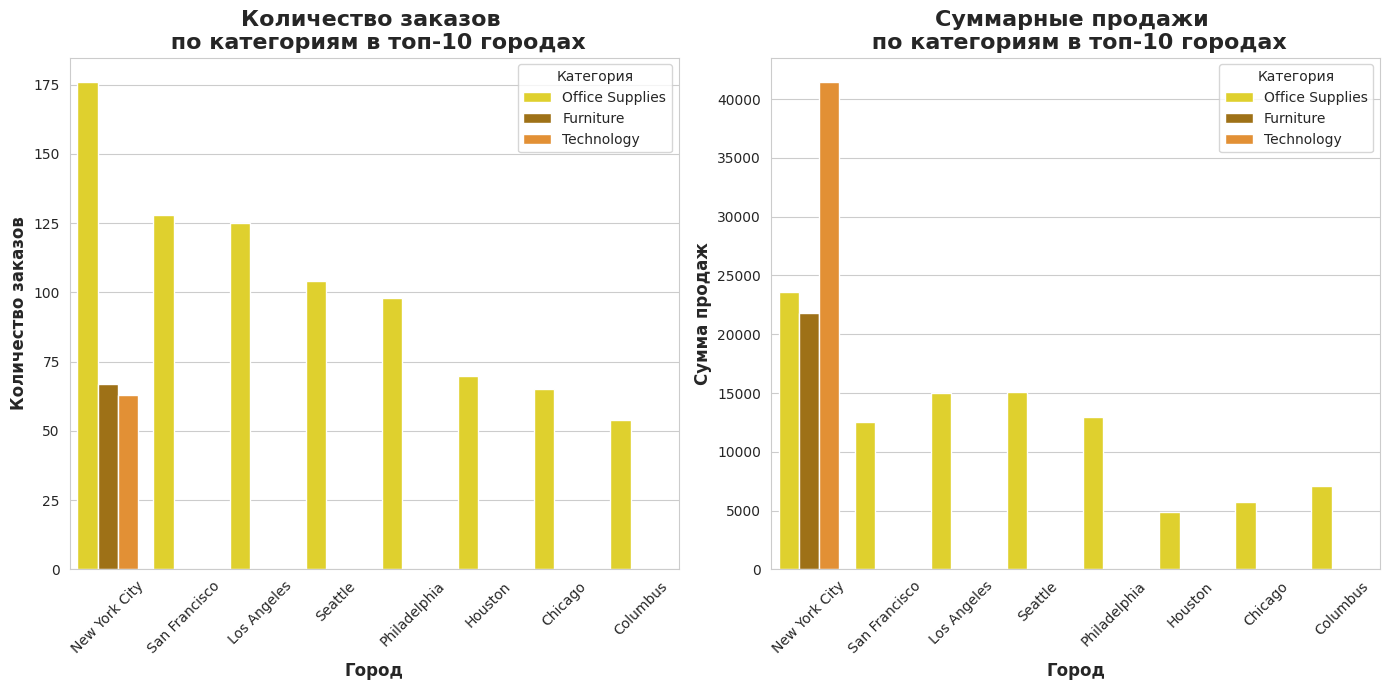

In [ ]:
# Уникальные цвета для категорий
category_colors = {
    'Furniture': contrast_colors[1],        # Мебель
    'Office Supplies': contrast_colors[10], # Офисные принадлежности
    'Technology': contrast_colors[2]        # Техника
}

# Создаем список цветов для графика на основе категории каждой строки
top_cities_sales['color'] = top_cities_sales['category'].map(category_colors)

plt.figure(figsize=(14, 7))

# График количества заказов по категориям в топ-10 городах
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_cities_sales,
    x='city',
    y='total_orders',
    hue='category',
    palette=category_colors
)
plt.title("Количество заказов \n по категориям в топ-10 городах", fontsize=16, fontweight='bold')
plt.xlabel("Город", fontsize=12, fontweight='bold')
plt.ylabel("Количество заказов", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Категория")

# График суммарных продаж по категориям в топ-10 городах
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_cities_sales,
    x='city',
    y='total_sales',
    hue='category',
    palette=category_colors
)
plt.title("Суммарные продажи \n по категориям в топ-10 городах", fontsize=16, fontweight='bold')
plt.xlabel("Город", fontsize=12, fontweight='bold')
plt.ylabel("Сумма продаж", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Категория")

plt.tight_layout()
plt.show()


**Вывод о распределении товара по категориям и городам:**

---

1. **Офисные принадлежности** - самая популярная категория в топ-10 городах по количеству заказов. В Нью-Йорке, Сан-Франциско, Лос-Анджелесе и Сиэтле зафиксированы наибольшие объемы продаж и количества заказов по данной категории. Это говорит о высоком спросе на офисные товары в крупных деловых центрах.
   
2. **Нью-Йорк** - лидирует как по количеству заказов, так и по сумме продаж, особенно по категориям "Офисные принадлежности" и "Техника". Нью-Йоркский спрос на технику также заметен: сумма продаж в этой категории здесь самая высокая, достигая более 41,000.

3. **Сан-Франциско и Лос-Анджелес** - сохраняют высокие показатели продаж в категории "Офисные принадлежности", что может быть связано с крупными корпоративными клиентами, ориентированными на офисные закупки.

4. **Техника** - имеет наибольшую долю продаж в Нью-Йорке, что указывает на высокий спрос на технологические продукты именно в этом городе. Средняя стоимость заказов по данной категории выше по сравнению с офисными принадлежностями.

5. **Филадельфия, Хьюстон и Колумбус** - также демонстрируют заметный спрос на офисные товары, но с меньшими объемами продаж. Вероятно, в этих городах более активны небольшие компании и частные покупатели.

В целом, крупные города показывают сильную приверженность к покупкам офисных товаров, а технологические продукты более востребованы в мегаполисах, таких как Нью-Йорк.

##10 . Динамика продаж внутри категорий товара


Для анализа сезонных и временных тенденций для каждой категории и их оценки
вычислим совокупные продажи по категориям в разрезе месяцев и отобразим результат на линейном графике.


Суммарные продажи по категориям по месяцам:
category      Furniture  Office Supplies  Technology
order_month                                         
2020-01       5964.0320        21274.289   16733.053
2020-02       6866.3374         7407.772    6027.024
2020-03      10893.4448        14550.286   33428.622
2020-04       9065.9581        15072.191   12383.387
2020-05      16957.5582        13736.964   13566.588
2020-06      19008.5867        16912.039   17061.100
2020-07      11813.0220        10241.468   23209.926
2020-08      15441.8740        30059.852   17619.162
2020-09      29028.2060        31895.843   26942.603
2020-10      21884.0682        23037.192   32855.663
2020-11      37056.7150        31472.337   49918.773
2020-12      31407.4668        30436.942   21984.910


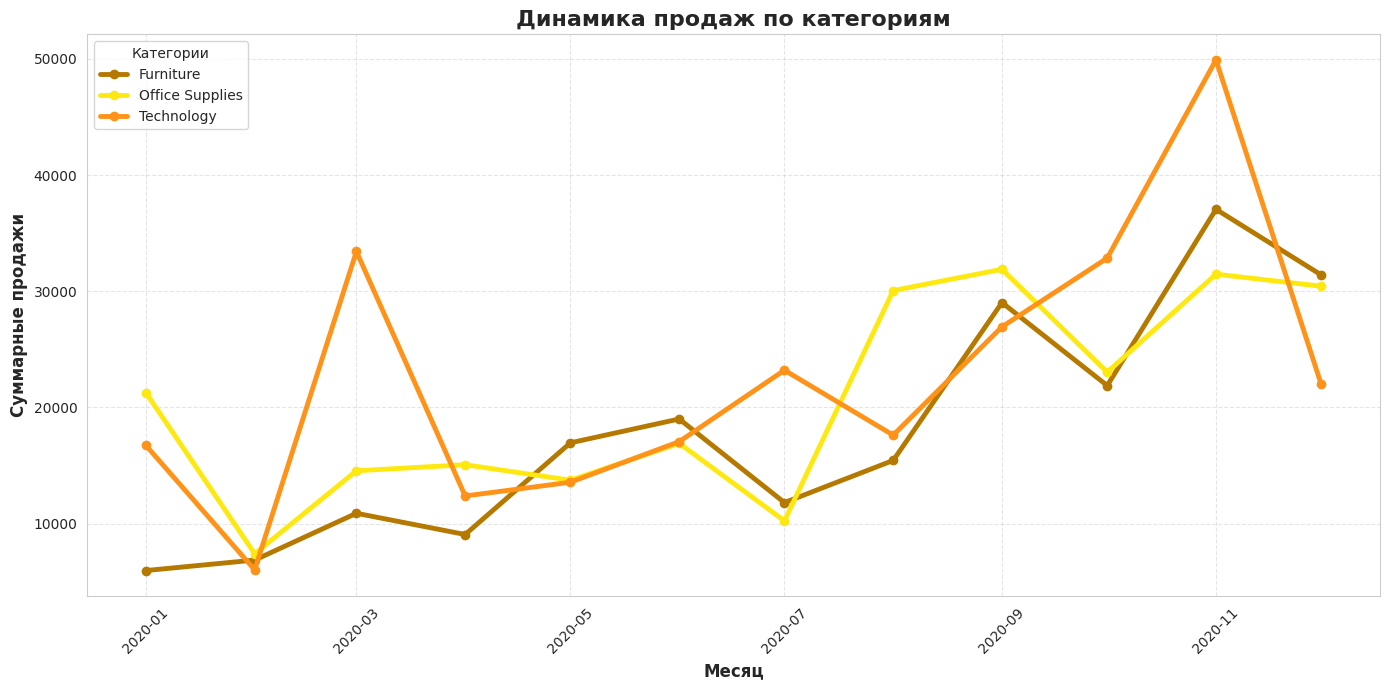

In [ ]:
# Преобразуем столбец с датами заказов в формат datetime, если это ещё не сделано
#df_purified['order_date'] = pd.to_datetime(df_purified['order_date'])

# Добавляем столбец с месяцами
df_purified['order_month'] = df_purified['order_date'].dt.to_period('M')

# Группируем данные по месяцам и категориям, суммируя продажи
monthly_sales_by_category = df_purified.groupby(['order_month', 'category'])['sales'].sum().unstack()

# Вывод статистики для проверки
print("Суммарные продажи по категориям по месяцам:")
print(monthly_sales_by_category)

# Построение линейного графика
plt.figure(figsize=(14, 7))

for category in monthly_sales_by_category.columns:
    plt.plot(
        monthly_sales_by_category.index.to_timestamp(),
        monthly_sales_by_category[category],
        label=category,
        color=category_colors[category],  # Используем цвета, заданные пользователем
        linewidth=3.5,
        marker='o'
    )

plt.title('Динамика продаж по категориям', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Категории')
plt.tight_layout()
plt.show()


**Вывод о динамике продаж по категориям товара**

---

Анализ динамики суммарных продаж по категориям по месяцам показал следующие тенденции:

1. **Office Supplies (Офисные принадлежности)**:
   - Эта категория демонстрирует стабильные и высокие объемы продаж на протяжении года, с наибольшими значениями в августе (30,059.85) и сентябре (31,895.84).
   - Увеличение продаж в осенний период может свидетельствовать о росте спроса перед началом учебного и делового сезонов.

2. **Furniture (Мебель)**:
   - Продажи мебели проявляют сезонные колебания, с пиками в мае (16,957.56) и сентябре (29,028.21).
   - Высокие продажи в начале осени могут быть связаны с подготовкой офисных пространств и домохозяйств к зимнему сезону.

3. **Technology (Техника)**:
   - Эта категория демонстрирует наибольший рост в ноябре (49,918.77), вероятно, из-за увеличения покупок техники к концу года, что может быть связано с акциями и распродажами в этот период.
   - В течение весны и лета также наблюдаются значительные продажи, что указывает на стабильный интерес к технике.

В целом, каждая категория имеет свои сезонные особенности, однако наибольший прирост продаж во всех категориях наблюдается в предновогодний период.



---


#**Раздел 4: Общие выводы и закономерности**

---

1. **Динамика количества заказов по месяцам**:
   - Наблюдается рост заказов во втором полугодии, особенно в ноябре и декабре, что может быть связано с сезонным спросом в праздничные периоды.
   - Спад в начале года, особенно в феврале, указывает на завершение праздничного сезона и снижение покупательской активности.
   - Летние месяцы демонстрируют стабильное количество заказов, что может свидетельствовать о равномерном уровне спроса в этот период.
   - Резкий рост заказов в сентябре указывает на начало подготовки к учебному году и подъему деловой активности населения после летнего периода.

2. **Динамика суммы продаж**:
   - Значительный рост суммы продаж в ноябре, возможно, связан с акциями «Черная пятница» и предрождественскими распродажами.
   - Пиковые продажи в сентябре могут указывать на успешные маркетинговые кампании, запуск новых продуктов или сезонное увеличение деловой активности.
   - Меньшие объемы продаж в начале года подтверждают наличие послепраздничного спада, особенно в январе и феврале.
   - Нестабильность в летние месяцы может требовать дальнейшего анализа потребительского поведения.

3. **Суммарные продажи по категориям и подкатегориям**:
   - Категория Technology (Техника) является наиболее доходной, с наибольшими продажами в подкатегории "Phones" (Телефон).
   - Высокие продажи в категории Furniture (Мебель), особенно в подкатегории "Chairs" (Стулья), показывают спрос на офисные и домашние предметы.
   - В категории Office Supplies (Офисные принадлежности) подкатегория "Binders" (Папки) демонстрирует значительные объемы продаж.

4. **Продажи по городам, штатам и регионам**:
   - Нью-Йорк лидирует по суммарной выручке, что подтверждает высокий спрос на продукцию в крупных городах.
   - Штаты Калифорния и Нью-Йорк показывают значительные объемы продаж, что указывает на экономическое развитие этих регионов.
   - Западный регион выделяется высокими суммарными продажами, что может потребовать дополнительного маркетингового внимания в Центральном и Южном регионах.

5. **Топ-10 популярных товаров**:
   - Бумага писчая занимает первое место по количеству заказов, что указывает на устойчивый спрос на канцелярские товары.
   - Анализ популярных товаров может помочь в дальнейшем планировании запасов и маркетинговых стратегий.

6. **Покупательская активность по категориям в крупных городах**:
   - Офисные принадлежности являются самой популярной категорией в крупных городах, что подчеркивает значимость этой категории для бизнеса.
   - Техника имеет наибольшую долю продаж в Нью-Йорке, что говорит о высоком спросе на технологические продукты в мегаполисах.

7. **Динамика продаж по категориям по месяцам**:
   - Каждая категория продаж имеет свои сезонные особенности, с наибольшим приростом в предновогодний период, что может быть учтено при планировании маркетинговых акций.

Эти выводы помогут в дальнейшем стратегическом планировании, управлении запасами и определении маркетинговых кампаний для увеличения продаж.